#  Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
from numpy import array, arange
import scipy.constants as pc
from math import pi,sqrt
import math
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# import physical constants
a = pc.physical_constants['Bohr radius'][0] #Bohr radius
E0 = pc.physical_constants['Rydberg constant times hc in eV'][0]
me=pc.m_e # electron mass
hbar=pc.hbar
e=pc.e # elementary charge
eps=pc.epsilon_0 #Vacuum permittivity

In this problem we will use shooting and RK4 to find the bound states of hydrogen for a couple of cases. The calculation will involve finding both the energy eigenvalues and the related eigenfunctions for the radial part of the Schrödinger equation. In our calculation, I will  set initial conditions on $R(r=0)$ and an intermediate function $S(r=0)$. Because the RHS of the radial equation diverges at $r = 0$, we will carry out our integration starting at $r = h$, where h is the step size, and set $R(h)= 0$ and $S(h)=1$. This will cause the eigenfunction to go to zero at $r= 0$.

# Part A
First, we will change the second order ODE (radial equation - lab manual equation (2)) in r as a pair of coupled first order ODEs for $R$ and $S$. The two first ordered equations follow:
\begin{equation} 
\frac{dR}{dr}=S
\end{equation}

\begin{align}
\frac{dS}{dr}&=\frac{l(l+1)R}{r^2}+\frac{2m}{\hbar}[V(r)-E]R-\frac{2S}{r}, & \text{where} \;\;\; V(r)&=\frac{-e^2}{4\pi\epsilon_{0}r}
\end{align}

We will set the step size $h$ and the the maximum value of r, which theoretically is r at infinity, but in order to compute a solution we must set the wavefunction to be 0 at some large value of r (which here we call $r(\infty)$). To start with, set $h=0.002a$ and $r(\infty) = 20a$, where $a = 5 \times 10^{-11}$m is the Bohr radius. We will make $r(\infty)$ larger and make h smaller to improve the solution.
We will set a left boundary condition on $R$ near $r=0$. We will set $R(h) = 0$. Also, we will set the target accuracy as $e/1000$, where $e$ is elementary charge but later we will reduce the target accuracy and find how it impact the result. 
Finally, We will initialize our eigenenergies at some level for the secant method to work. We choose the initial values of $E_1=\frac{-15e}{n^2}$ and $E_2=\frac{-13e}{n^2}$

Define the potential function and function which contatins two first ordered ODE's:

In [3]:
# Potential function
def V(r):
    return -(e**2)/(4*pi*eps*r)

# write out the second order ODE in r as a pair of 
# coupled first order ODEs for R and S
def f(ar,r,E,l): #use 'ar' instead of 'r' in text book 
    """ Return system of ODES for given inputs """
    R=ar[0]
    S=ar[1]
    fR=S #first equation of first order ODE
    #second equation of first order ODE
    fS=l*(l+1)*R/r**2+2*me*(V(r)-E)*R/(hbar**2)-2*S/r
    return array([fR,fS],float) 

Define the function which calculate the wavefunction for a particular energy and l using RK4 (take RK4 example from textbook)

In [4]:
def solve(E,l):
    """Solve ODE using RK4. Inputs: Energy and Ang momentum"""
    R = 0.0 # initial value of R 
    S = 1.0 #initial value of S
    ar = array([R,S],float)
    #RK4 method
    for r in arange(h,rinf,h): 
        k1 = h*f(ar,r,E,l)
        k2 = h*f(ar+0.5*k1,r+0.5*h,E,l)
        k3 = h*f(ar+0.5*k2,r+0.5*h,E,l)
        k4 = h*f(ar+k3,r+h,E,l)
        ar += (k1+2*k2+2*k3+k4)/6
        
    return ar[0] #return final value of R

# Part B

We now calculate numerically the ground state energy $(n=1)$ and the first excited state
energy $(n=2)$ for both $l= 0$ and $l= 1$. We will comment about the effect of adjusting the various parameters such as value at $r$ infity and reducing target accuracy.

In [5]:
# Define a function to find the scaled eigenenergies 
# using the secant method:

def Energy(l,n,target):
    """ Find scaled eigenergy using Secant Method.
    INPUTS: energy level, ang. momentum, target evergy convergence
    OUTPUT: Energy eigenvalue """
    E1 = -15*e/n**2 #initialize first guess of eigen energies
    E2 = -13*e/n**2
    R2 = solve(E1,l) # call RK4 function to get R

    # Secant method
    while abs(E1-E2)>target:
        R1,R2 = R2,solve(E2,l) 
        E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1)
    return E2/e #return scaled eigen energy 

Now we use our functions to find the energy eigenvalues for each case:

In [6]:
h=0.002*a #step size
rinf=20*a # r value at infinity
target = e/1000 # target energy convergence

print("The ground state energy is:",Energy(0,1,target),"eV")
print("The fist excited state energy with l=0 is:",Energy(0,2,target),"eV")
print("The first excited state energy with l=1 is:",Energy(1,2,target),"eV")

The ground state energy is: -13.4879439019 eV
The fist excited state energy with l=0 is: -3.38628652103 eV
The first excited state energy with l=1 is: -3.40127670444 eV


To investigate the impact of adjusting various parameters, I will increase the $r(\infty)$ value from $20a$ to $21a$ and reduce the $h$ value from $0.002a$ to $0.001a$, and reduce the target accuracy to $e/2000$. The results are below: 
Therefore, adjusting parameter gives closer value to the actual eigen energies.
It makes sense because reducing steps and target accuracy means more precise computation and increasing range of r produces better approximation of energy eigenvalues.

In [7]:
h=0.001*a #step size
rinf=21*a # r value at infinity
target = e/2000 # target energy convergence

print("The NEW ground state energy is:",Energy(0,1,target),"eV")
print("The NEW fist excited state energy with l=0 is:",Energy(0,2,target),"eV")
print("The NEW first excited state energy with l=1 is:",Energy(1,2,target),"eV")

The NEW ground state energy is: -13.5459439234 eV
The NEW fist excited state energy with l=0 is: -3.39377647512 eV
The NEW first excited state energy with l=1 is: -3.40135718033 eV


When we compare these values to the true eigenvalues, we find that adjusting the parameters as above gives closer calculated value to the true eigenenergies. In other words, we adjusted our paramaters to be more accurate. In fact, each modification we made independently makes our answer better. We encourage the reader to modify the values above and verify this conclusion.

To summarize, 3 things make our answer more accurate:

1. Increasing the maximum $r$ value

2. Decreasing the step size

3. Decreasing the allowed target accuracy

This makes sense as the first condition better approximate our assumptions for a finite r to an infinite domain, the second improves our solution to the ODE numerically, and the third forces the program to work harder until a higher accuracy is achieved.

# Part C
We will modify the functions from part (b) and create arrays for different Radial wavefunctions, then normalize them using the built-in function for Simpson's rule from $\texttt{scipy.integrate}$. Then we will plot these normalized wavefunction as a funciton of $r$ over a finite range.

To create the function that will in turn create the array for our radial wave function $R(r)$, we will just use RK4 method again but this time we will append values to the array after each cycle so at the end the array has elements of $R(r)$ with different $r$.

In [8]:
# This function takes value of l and n, 
# Then gives the corresponding elements of R(r)
def Rr(l,n): 
    """ Solve ODE using RK4 - as before but now output array
    with values at each step (not just final value)"""
    Rr=[] #array of R(r)
    E=Energy(l,n,e/1000)*e #scale back the Energy eigenvalues
    R = 0.0 #initial values
    S = 1.0
    ar = array([R,S],float)
    #use RK4 method
    for r in arange(h,rinf,h): 
        Rr.append(ar[0])
        k1 = h*f(ar,r,E,l)
        k2 = h*f(ar+0.5*k1,r+0.5*h,E,l)
        k3 = h*f(ar+0.5*k2,r+0.5*h,E,l)
        k4 = h*f(ar+k3,r+h,E,l)
        ar += (k1+2*k2+2*k3+k4)/6
    return Rr #return the array of R(r)

Create the function to the normalize radial wavefunctions using Simpson'rule

In [9]:
#define function to normalize wavefunction using Simpson's Rule
def normalize(l,n,N):
    return array(Rr(l,n))/sqrt(abs(integrate.simps((array(Rr(l,n)))**2))) 

To verify that our functions are correct, we will plot the first three normalized Radial wave functions (which are well known, just do a quick google search). We find that we get the right answer.

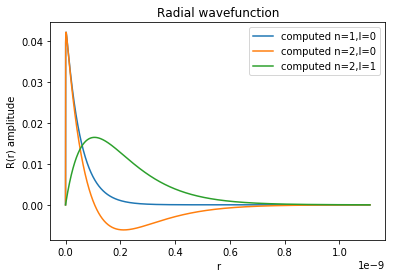

In [10]:
r=arange(h,rinf,h)
#plot solutions we got from code
plt.plot(r,normalize(0,1,1000),label="computed n=1,l=0")
plt.plot(r,normalize(0,2,1000),label="computed n=2,l=0")
plt.plot(r,normalize(1,2,1000),label="computed n=2,l=1")
plt.legend()
plt.title("Radial wavefunction")
plt.xlabel("r")
plt.ylabel("R(r) amplitude")
plt.show()

# Part D

To verify our solutions once more, we will now plot the actual analytic solutions for $R(r)$ and overlay them on top of our numerically calculated solutions. We will Then compare how two solutions are different in terms of overall shape and zero crossings.

Here we create the functions $\texttt{realr1}$, $\texttt{realr2}$, $\texttt{realr3}$ which are the analytic solutions for $n=1$, $n=2(l=0)$, and $n=2(l=1)$ respectively. We normalize these using Simson and plot them over the solutions we computed in Part C.

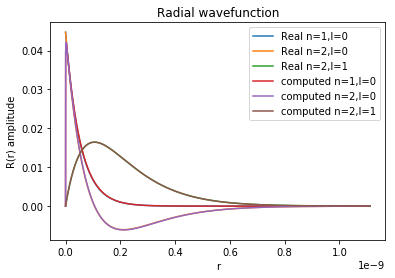

In [11]:
#define real Radial wavefunctions we got from internet:

def realr1(r): #solutions for n=1
    return (2/a**(3/2))*math.e**(-r/a)

def realr2(r): #solutions for n=2,l=0
    return ((2-r/a)*(math.e**(-r/(2*a))))/(2*(sqrt(2))*a**(3/2))

def realr3(r):#solutions for n=2,l=0
    return r*math.e**(-r/(2*a))/(a*2*sqrt(6)*a**(3/2))

# Initialize lists to store R(r) values for different r
r1=[]
r2=[]
r3=[]

# Loop for all elements in our r array and append R(r) values to lists
for i in r:
    r1.append(realr1(i))
    r2.append(realr2(i))
    r3.append(realr3(i))
    
# Plot the results!
plt.plot(r,array(r1)/sqrt(abs(integrate.simps((array(r1)**2)))),label="Real n=1,l=0")
plt.plot(r,array(r2)/sqrt(abs(integrate.simps((array(r2)**2)))),label="Real n=2,l=0")   
plt.plot(r,array(r3)/sqrt(abs(integrate.simps((array(r3)**2)))),label="Real n=2,l=1")

#plot solutions we got from code
plt.plot(r,normalize(0,1,1000),label="computed n=1,l=0")
plt.plot(r,normalize(0,2,1000),label="computed n=2,l=0")
plt.plot(r,normalize(1,2,1000),label="computed n=2,l=1")
plt.title("Radial wavefunction")
plt.xlabel("r")
plt.ylabel("R(r) amplitude")
plt.legend()
plt.show()

The computed radial wavefunctions and the explicit wavefunctions are almost identical - in fact visually we can't even see a difference! It looks like there are only 3 distinct graphs instead of 6 graphs. Therefore, our computed radial wavefunctions are really close to the actual radial wavefunctions. The number of zeros crossing for the wavefunctions are the same for computed and explicit also. This means that our computation is quite accurate. Yay!